## Hotel Bookings

In [1]:
#First and Foremost, load packages I need and the data I selected for this project, hotel booking data gathered from July 2015
#to August 2017
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn import preprocessing
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
%matplotlib inline

df = pd.read_csv("./hotel_bookings1.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [2]:
df.shape

(119390, 32)

In [3]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

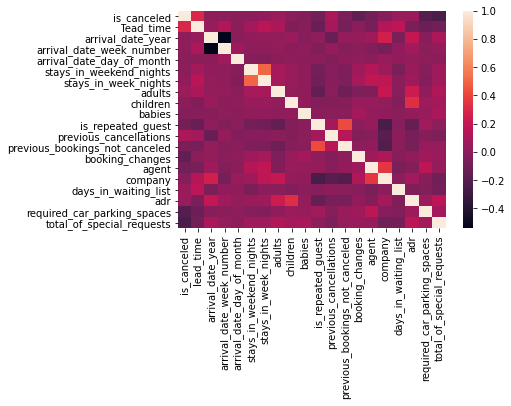

In [5]:
#Heat Map to give me an overview of relationship between each numerical variables
sns.heatmap(df.corr(), annot=False);

In [6]:
#To get hotel rate trend for the whole year, the best way in this dataset is to create a new date for time series visualization.
#I don't know whether some packages can identify Month word, so for sake of security, I map it to number and then generate
#Date Variable. 
month = df.arrival_date_month.map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, \
                                   'September':9, 'October':10, 'November':11, 'December':12})
df.insert(5, 'month', month)
arrival_date = pd.to_datetime((df.arrival_date_year*10000+df.month*100+df.arrival_date_day_of_month).apply(str),format='%Y%m%d')
df.insert(3, 'arrival_date', arrival_date)
df.head()


,hotel,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_date_month,month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,7,27,1,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,7,27,1,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,7,27,1,0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,7,27,1,0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,7,27,1,0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
#Then I only collected data I need for current subject
df_rate_trend = df.groupby(by = ['hotel','arrival_date'])['adr'].mean().reset_index(0)
Trend_City_Hotel = df_rate_trend[df_rate_trend.hotel == 'City Hotel']
Trend_Resort_Hotel = df_rate_trend[df_rate_trend.hotel == 'Resort Hotel']
df_rate_trend

,hotel,adr
arrival_date,,
2015-07-01,City Hotel,94.208861
2015-07-02,City Hotel,64.452449
2015-07-03,City Hotel,73.970000
2015-07-04,City Hotel,64.263158
2015-07-05,City Hotel,66.487500
...,...,...
2017-08-27,Resort Hotel,189.582388
2017-08-28,Resort Hotel,204.031026
2017-08-29,Resort Hotel,181.666286


In [8]:
def rate_trend_visual(df, hotel_type):
    '''
    INPUT
    df - pandas dataframe including data we need for line chart
    hotel_type - string describing which hotel type including 'resort hotel' and 'city hotel'
    
    OUTPUT
    Line chart showing yearly rate trend from July 2015 to July 2017 for either hotel type
    One saved chart in current repository
    
    Perform to obtain the correct X and y objects
    This function shows hotel yearly rate trend using the following steps to produce X and y:
    1. Grab data filtered by hotel type
    2. Plot line chart using seaborn package
    3. Add x and y axis titel; chart titel
    4. Save chart image to current repository for further use in post or presentation
    '''
    
    df = df_rate_trend[df_rate_trend.hotel == hotel_type]
    sns.set(rc={'figure.figsize':(10, 4)})
    ax = df['adr'].plot(linewidth=1)
    ax.set_ylabel('Average Daily Rate')
    ax.set_xlabel('Customer Arrival Date')
    ax.set_title('2015-2017 '+ hotel_type + ' Daily Rate Trend')
    ax.figure.savefig(hotel_type + ".png");

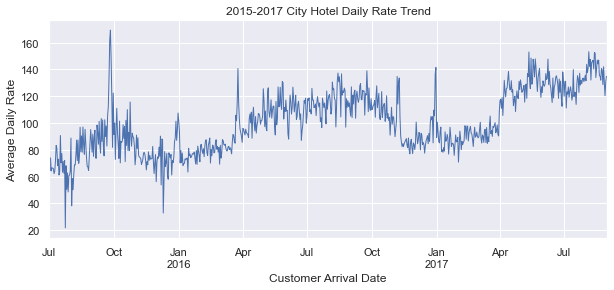

In [9]:
#Now use rate trend visualization function to generate charts
rate_trend_visual(df_rate_trend, 'City Hotel')

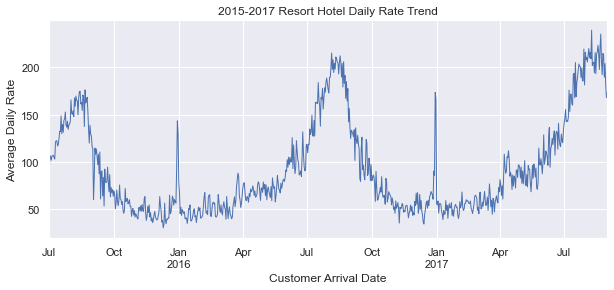

In [10]:
#Resort yearly rate trend
rate_trend_visual(df_rate_trend, 'Resort Hotel')

In [11]:
#Select Key features I want to know deeper between two hotels, First, I select all numeric variables 
df.select_dtypes(include=['number']).columns
#Maybe tease out 'agent', 'company', 'arrival_date_year', 'arrival_date_week_number', 'month', 'arrival_date_day_of_month'
col_name = list(set(df.select_dtypes(include=['number']).columns) - set(['agent', 'company', 'arrival_date_year', \
                    'arrival_date_week_number', 'month', 'arrival_date_day_of_month']))
#Now I finish preparing my data
df_compare = df[['hotel'] + col_name]
df_compare.head()
df_compare = df_compare.groupby(by='hotel').mean().transpose()

In [12]:
#compare difference between 2 hetels 
df_compare['Difference'] = (df_compare['Resort Hotel'] - df_compare['City Hotel'])/df_compare['City Hotel']
df_compare.style.bar(subset=['Difference'], align='mid', color=['#d65f5f', '#5fba7d']).format({'Difference': "{:.2%}"})

hotel,City Hotel,Resort Hotel,Difference
children,0.091370,0.128682,40.84%
adults,1.850977,1.867149,0.87%
babies,0.004941,0.013904,181.38%
required_car_parking_spaces,0.024367,0.138068,466.63%
stays_in_week_nights,2.182957,3.128732,43.33%
lead_time,109.735724,92.675686,-15.55%
is_repeated_guest,0.025615,0.044383,73.27%
total_of_special_requests,0.546918,0.619770,13.32%
previous_bookings_not_canceled,0.132371,0.146455,10.64%
is_canceled,0.417270,0.277634,-33.46%


In [13]:
#Exploratory Analysis for the whole dataset
df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [14]:
#Calculate cancellation rate
44224 / (44224 + 75166)

0.37041628277075134

In [15]:
#Data Selection and Cleaning for modeling
#Only 4 columns exist missing value. After analysis, 2 of them, agent and company are not needed in my model; 2 of then appears 
#missed not deliberately, more like data entry errors, so I decided to select only necessary columns for model and delete
#all missing data. 
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date                           0
arrival_date_year                      0
arrival_date_month                     0
month                                  0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type    

In [16]:
#Drop all missing values in 'children' and 'country' because in this case, missing values exist because of data entry problems
#For Company and agent column, I just deleted the whole column since they're just ID, making no sense for modeling
df.dropna(subset = ['children','country'], inplace = True)
df.shape

(118898, 34)

In [17]:
#Select Numerical Variables First and create a new dataframe; Create dummy variables for categorical variables then;
#Tease out Agent and Company, which are just ID numbers. 
Num_col = list(set(df.select_dtypes(include=['number']).columns) - set(['agent', 'company']))
df_new = df[Num_col]
#Tease out reservation_status and reservation_status_date since they happen always after customers cancel bookings, I assume 
#it will not affect cancellation rate
Cat_col = list(set(df.select_dtypes(include=['object']).columns) - set(['reservation_status_date', 'reservation_status']))
#Now add dummy variables
for n in Cat_col:
    df_new = pd.concat([df_new, pd.get_dummies(df[n], prefix=n, prefix_sep='_', drop_first=True)], axis = 1)
df_new.shape

(118898, 246)

In [18]:
#Now ths data is ready! It's time for modeling!
#Split into explanatory and response variables
X = df_new.drop('is_canceled', axis=1)
X = preprocessing.normalize(X)
y = df_new['is_canceled']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#USE Recursive Feature Elimination in Sklearn to get the best features
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_);

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False False False  True  True
 False False False False  True  True False False  True False False False
  True False False False False False  True False False False  True  True
  True False False  True False False  True  True False False False  True
  True False False  True False  True False False  True  True False  True
 False  True False False  True  True False False False False False  True
 False False  True False False  True  True False False  True False False
  True  True  True False False False  True False False False False False
  True False False False False False False False  True False  True  True
  True False False  True  True False False False False False False False
 False False  True False False False  True False  True  True False  True
 False  True False False  True False  True False  True False False False
  True False False  True False False False False Fa

In [19]:
#Now rfe helps me select the best features
X = df_new.drop('is_canceled', axis=1)
X_Col = X.columns[rfe.support_]
X = X[X_Col]
X = preprocessing.normalize(X)
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Implement Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_test_preds = logreg.predict(X_test)
#r2_score(y_test, y_test_preds)
#metrics.accuracy_score(y_test, y_test_preds)
"The accuracy for logistic model was {} on {} values.".format(metrics.accuracy_score(y_test, y_test_preds), len(y_test))

'The accuracy for logistic model was 0.6637510513036164 on 35670 values.'

In [20]:
#This is a roc curve function used to evaluate model performance
def roc_curve_f(y_test, y_test_preds, y_pred_prob, model_name):
    '''
    INPUT
    y_test - pandas series or array including testing y values
    y_test_preds - pandas series or array including predicted y values using testing x
    y_pred_prob - pandas series or array including predicted y probability values using testing x
    model_name - string to show which model was implemented for prediction
    
    OUTPUT
    ROC Curve to demonstrate model performance
    One saved chart picture in current repository
    '''
    sns.set(rc={'figure.figsize':(6, 4)})
    sns.set(style="white")
    sns.set(style="whitegrid", color_codes=True)
    logit_roc_auc = roc_auc_score(y_test, y_test_preds)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, label= model_name + '(area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

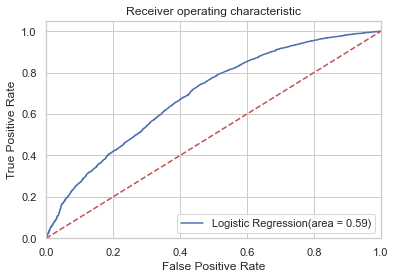

In [21]:
#Then observe model performance for logistic regression
y_pred_prob = logreg.predict_proba(X_test)[:,1]
roc_curve_f(y_test, y_test_preds, y_pred_prob, 'Logistic Regression')

In [22]:
#Then I tried Decision Tree to see whether I can get a better model
X = df_new.drop('is_canceled', axis=1)
#X = preprocessing.normalize(X)
y = df_new['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 20, min_samples_leaf=4) 
clf_gini.fit(X_train, y_train) 
y_test_preds = clf_gini.predict(X_test)
metrics.accuracy_score(y_test, y_test_preds)
"The accuracy for Decision Tree Classifier was {} on {} values.".format(metrics.accuracy_score(y_test, y_test_preds), \
                                                                        len(y_test))

'The accuracy for Decision Tree Classifier was 0.8487524530417718 on 35670 values.'

In [23]:
#Then I tried Random Forest Classifier to see whether I can get a better model
from sklearn.ensemble import RandomForestClassifier
X = df_new.drop('is_canceled', axis=1)
y = df_new['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf_gini = RandomForestClassifier(criterion = "gini", random_state = 100, max_depth = 20, min_samples_leaf=4) 
clf_gini.fit(X_train, y_train) 
y_test_preds = clf_gini.predict(X_test)
metrics.accuracy_score(y_test, y_test_preds)
"The accuracy for random Forest Classifier was {} on {} values.".format(metrics.accuracy_score(y_test, y_test_preds), \
                                                                        len(y_test))

'The accuracy for random Forest Classifier was 0.8510793383795907 on 35670 values.'

In [24]:
#Get the most important features through Random Forest results
importance = clf_gini.feature_importances_
imp_sort = sorted(importance, reverse=True) 
ranklst = [imp_sort.index(x) + 1 for x in importance]
[X.columns[ranklst.index(n)] for n in ranklst if n in range(30)]

['required_car_parking_spaces',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'previous_bookings_not_canceled',
 'adr',
 'arrival_date_year',
 'adults',
 'stays_in_week_nights',
 'lead_time',
 'total_of_special_requests',
 'stays_in_weekend_nights',
 'booking_changes',
 'month',
 'previous_cancellations',
 'country_DEU',
 'country_FRA',
 'country_GBR',
 'country_PRT',
 'distribution_channel_Direct',
 'distribution_channel_TA/TO',
 'hotel_Resort Hotel',
 'market_segment_Direct',
 'market_segment_Groups',
 'market_segment_Offline TA/TO',
 'market_segment_Online TA',
 'assigned_room_type_D',
 'deposit_type_Non Refund',
 'customer_type_Transient',
 'customer_type_Transient-Party']

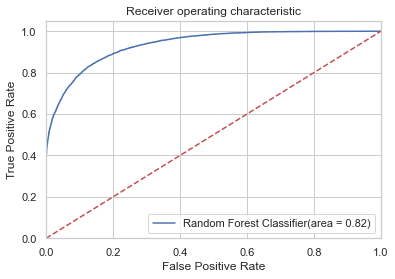

In [25]:
#Then observe model performance for Random Forest
y_pred_prob = clf_gini.predict_proba(X_test)[:,1]
roc_curve_f(y_test, y_test_preds, y_pred_prob, 'Random Forest Classifier')